Tarea: Doble derivada tangente hiperbolica.

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
x = tf.linspace(-10.0, 10.0, 200+1)
with tf.GradientTape() as derivate2:
    derivate2.watch(x)
    with tf.GradientTape() as derivate:
        derivate.watch(x)
        y = tf.tanh(x)
    dy_dx = derivate.gradient(y, x)
d2y_d2x = derivate2.gradient(dy_dx,x)

2022-06-20 21:00:18.755345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-20 21:00:18.755416: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-06-20 21:00:23.269094: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: UNKNOWN ERROR (100)
2022-06-20 21:00:23.269165: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-L6LJPH0): /proc/driver/nvidia/version does not exist
2022-06-20 21:00:23.269561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operati

In [2]:
print(d2y_d2x)

tf.Tensor(
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  7.15255624e-07  1.66892937e-06  1.43051102e-06
  2.14576608e-06  2.38418443e-06  3.09943903e-06  3.33785738e-06
  4.76836613e-06  5.00678379e-06  6.67570930e-06  8.34463299e-06
  9.53672043e-06  1.19208935e-05  1.47818973e-05  1.81197302e-05
  2.19343892e-05  2.67027026e-05  3.31399096e-05  4.05307474e-05
  4.86367971e-05  5.96037571e-05  7.31931650e-05  8.94049663e-05
  1.08954322e-04  1.33033143e-04  1.62594864e-04  1.98592810e-04
  2.43410555e-04  2.97047489e-04  3.63316911e-04  4.43171040e-04
  5.41852030e-04  6.61978789e-04  8.07956501e-04  9.86690167e-04
  1.20531931e-03  1.47193100e-03  1.79746351e-03  2.19498668e-03
  2.68040970e-

In [3]:
dy_dx

<tf.Tensor: shape=(201,), dtype=float32, numpy=
array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 3.57627869e-07, 8.34465027e-07, 7.15255737e-07,
       1.07288361e-06, 1.19209290e-06, 1.54972076e-06, 1.66893005e-06,
       2.38418579e-06, 2.50339508e-06, 3.33786011e-06, 4.17232513e-06,
       4.76837158e-06, 5.96046448e-06, 7.39097595e-06, 9.05990601e-06,
       1.09672546e-05, 1.33514404e-05, 1.65700912e-05, 2.02655792e-05,
       2.43186951e-05, 2.98023224e-05, 3.65972519e-05, 4.47034836e-05,
       5.44786453e-05, 6.65187836e-05, 8.13007355e-05, 9.93013382e-05,
       1.21712685e-04, 1.48534775e-04, 1.81674957e-04, 2.21610069e-04,
       2.70962715e-04, 3.3104

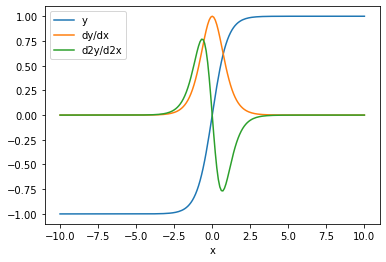

In [4]:
plt.plot(x, y, label='y')
plt.plot(x, dy_dx, label='dy/dx')
plt.plot(x, d2y_d2x, label='d2y/d2x')
plt.legend()
_ = plt.xlabel('x')

Tarea: Clasificador lineal tensor flow

In [5]:
import numpy as np 

num_samples_per_class = 1000 

negative_samples = np.random.multivariate_normal(mean=[0,3],
                                                 cov=[[1.,0.5],
                                                      [0.5,1]],
                                                 size=num_samples_per_class)

positive_samples = np.random.multivariate_normal(mean=[1,0.5],
                                                 cov=[[1.,0.5],
                                                      [0.5,1]],
                                                 size=num_samples_per_class)

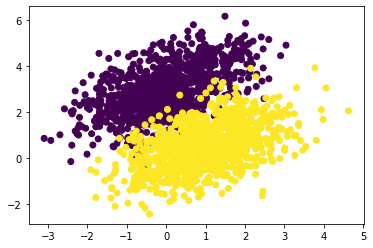

In [6]:
X = np.vstack((negative_samples, positive_samples)).astype(np.float32)

y = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
               np.ones((num_samples_per_class, 1), dtype="float32")))

plt.scatter(X[:,0],X[:,1],c=y[:,0])

In [7]:
np.random.seed(42)
tf.random.set_seed(42)
shufflers = np.random.permutation(len(X))
X = X[shufflers]
y = y[shufflers]

perc = 0.8
total = len(X)
X_train, y_train = X[:int(total*perc)],y[:int(total*perc)]
X_test, y_test = X[int(total*perc):],y[int(total*perc):]

In [8]:
class Model:
    def __init__(self, input_dim, output_dim):
        self.W = tf.Variable(initial_value= tf.random.uniform(shape=(input_dim,output_dim))) 
        self.b = tf.Variable(initial_value= tf.random.uniform(shape=(output_dim,))) 

    def __call__(self,X):
        #Con funcion de activacion Sigmoid.
        return 1 / (1+tf.exp(-1*(tf.matmul(X,self.W) + self.b )))


In [9]:
#Implementacion de dos capas para el modelo
layer1 = Model(2,2)
layer2 = Model(2,1)


In [10]:
def square_loss(y,y_pred):
    per_samples_lasses = tf.square(y-y_pred)
    return tf.reduce_mean(per_samples_lasses)

In [16]:
learning_rate = 0.1
def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        #Capa 1 de la red
        predictions = layer1(inputs)
        #Capa 2 de la red
        output = layer2(predictions)
        loss = square_loss(targets,output)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[layer2.W, layer2.b]) 
    layer2.W.assign_sub(learning_rate*grad_loss_wrt_W)
    layer2.b.assign_sub(learning_rate*grad_loss_wrt_b)
    return loss

In [17]:
for step in range(40):
    loss = training_step(X_train,y_train)
    print(f'Step: {step}, loss: {loss}')

Step: 0, loss: 0.2469872236251831
Step: 1, loss: 0.24697870016098022
Step: 2, loss: 0.24697017669677734
Step: 3, loss: 0.24696165323257446
Step: 4, loss: 0.24695312976837158
Step: 5, loss: 0.2469445765018463
Step: 6, loss: 0.24693606793880463
Step: 7, loss: 0.24692754447460175
Step: 8, loss: 0.24691902101039886
Step: 9, loss: 0.24691051244735718
Step: 10, loss: 0.2469019740819931
Step: 11, loss: 0.24689346551895142
Step: 12, loss: 0.24688495695590973
Step: 13, loss: 0.24687644839286804
Step: 14, loss: 0.24686793982982635
Step: 15, loss: 0.24685940146446228
Step: 16, loss: 0.2468509078025818
Step: 17, loss: 0.2468424290418625
Step: 18, loss: 0.2468339204788208
Step: 19, loss: 0.24682539701461792
Step: 20, loss: 0.24681690335273743
Step: 21, loss: 0.24680839478969574
Step: 22, loss: 0.24679988622665405
Step: 23, loss: 0.24679137766361237
Step: 24, loss: 0.24678286910057068
Step: 25, loss: 0.24677440524101257
Step: 26, loss: 0.2467658966779709
Step: 27, loss: 0.2467573881149292
Step: 28, 

In [18]:
y_pred = layer2(X_test) > 0.5
y_pred = np.array(y_pred)


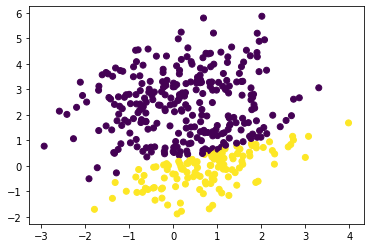

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred[:,0])

In [20]:
acc = sum((y_test==y_pred))/len(y_test)
acc

array([0.765])

¿Qué tipo de entrenamiento se acabo de hacer?, ¿mini-batch?, ¿batch?
R/ Batch, el entrenamiento se hace con dos divisiones del dataset, el batch general para el entrenamiento y la segunda parte para el testeo.

Plotear la curva de decisión

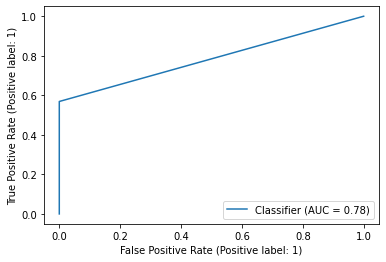

In [22]:
import sklearn.metrics

sklearn.metrics.RocCurveDisplay.from_predictions(y_test, y_pred)

Tarea: Con los mismos pasos anteriores realzar clasificación sobre la base de datos MNIST de digitos.

Para ello:

    Función de activación última capa softmax
    Sparse categorical crossentropy
    Dataset displonibles en keras



In [93]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = tf.keras.datasets.mnist.load_data()

# Flatten the images
image_vector_size = 28*28
x_train_mnist = x_train_mnist.reshape(x_train_mnist.shape[0], image_vector_size)
x_test_mnist = x_test_mnist.reshape(x_test_mnist.shape[0], image_vector_size)

# Convert to "one-hot" vectors using the to_categorical function
num_classes = 10
y_train_mnist = tf.keras.utils.to_categorical(y_train_mnist, num_classes)
y_test_mnist = tf.keras.utils.to_categorical(y_test_mnist, num_classes)

In [63]:
y_train_mnist.shape

(60000, 10)

In [104]:
#Con API funcional

input = tf.keras.layers.Input(shape=(image_vector_size))
x1 = tf.keras.layers.Dense(units=32,activation=tf.keras.activations.tanh)(input)

output = tf.keras.layers.Dense(units=10, activation = tf.keras.activations.softmax)(x1)

model = tf.keras.Model(input,output)

In [105]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              metrics=[tf.keras.metrics.CategoricalCrossentropy()])

In [107]:
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_58 (Dense)            (None, 32)                25120     
                                                                 
 dense_59 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [108]:
history = model.fit(x_train_mnist,y_train_mnist,
                    validation_data=(x_test_mnist,y_test_mnist),
                    epochs=10,
                    batch_size=4)

Epoch 1/10
15000/15000 [==============================] - 100s 7ms/step - loss: 1.1858 - categorical_crossentropy: 1.1858 - val_loss: 0.8212 - val_categorical_crossentropy: 0.8212
Epoch 2/10
15000/15000 [==============================] - 105s 7ms/step - loss: 0.7089 - categorical_crossentropy: 0.7089 - val_loss: 0.6355 - val_categorical_crossentropy: 0.6355
Epoch 3/10
15000/15000 [==============================] - 104s 7ms/step - loss: 0.5955 - categorical_crossentropy: 0.5955 - val_loss: 0.5671 - val_categorical_crossentropy: 0.5671
Epoch 4/10
15000/15000 [==============================] - 110s 7ms/step - loss: 0.5748 - categorical_crossentropy: 0.5748 - val_loss: 0.5096 - val_categorical_crossentropy: 0.5096
Epoch 5/10
15000/15000 [==============================] - 89s 6ms/step - loss: 0.5199 - categorical_crossentropy: 0.5199 - val_loss: 0.4412 - val_categorical_crossentropy: 0.4412
Epoch 6/10
15000/15000 [==============================] - 94s 6ms/step - loss: 0.4961 - categorical_c

Text(0.5, 0, 'epoch')

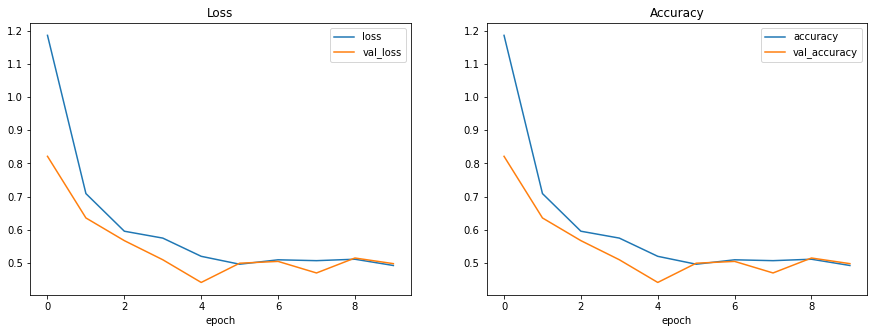

In [110]:
loss = history.history['loss']
accuracy = history.history['categorical_crossentropy']

val_loss = history.history['val_loss']
val_accuracy = history.history['val_loss']  

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')